In [1]:
# Load thư viện
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sqlalchemy
from datetime import datetime
plt.style.use('ggplot')  #đẹp hơn
#Lấy tất cả column trên tập dataset
pd.set_option('display.max_columns', 200)

C:\Users\admin\AppData\Local\Temp\ipykernel_1304\1415426978.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'sqlalchemy'

In [111]:
# Kết nối với SQL Server bằng Windows Authentication
server = 'PS1BICCAPP01'
database = 'TEMP'
cnxn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;")

query = "select * from TEMP.dbo.QUYNHNTT17_PHAN_TICH_AFD_FINAL_RAW_20240430 where IS_AUTHORIZATION = 'fin';"

afd_raw = pd.read_sql(query, cnxn)

C:\Users\quynhntt17\AppData\Local\Temp\ipykernel_24120\2381415699.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  afd_raw = pd.read_sql(query, cnxn)


In [4]:
df = pd.read_excel('C:/Users/admin/Downloads/phan_tich_AFD.xlsx', sheet_name='raw_all')  # Assuming sheet 0 (optional)


In [5]:
df

,ID,AMND_DATE,AMND_OFFICER,AUTH_CODE,IS_AUTHORIZATION,OUTWARD_STATUS,POSTING_DATE,POSTING_STATUS,REQUEST_CATEGORY,RETURN_CODE,...,MERCHANT_ID,CREATE_DATE,UPDATE_DATE,card_type,cif,segment,RATE,GTGD_QD,trans_date_update,month
0,7864885400,2024-04-02,OWS_TS,584765,Auth,Processed,2024-04-02,InActive,Request,Successfully completed,...,552948000000000,NaN,2024-04-05 04:29:58,credit,3557714,AF,1,24825.00,2024-04-01,202404
1,6665915630,2023-12-18,Daovt_6279,134025,Fin,Closed,2023-12-18,Posted,Advice,Invalid amount,...,313649176887,NaN,2023-12-21 03:38:45,credit,333162,AF,25243,956457.27,2023-12-16,202312
2,8016785510,2024-04-14,OWS_TS,624451,Auth,Processed,2024-04-15,InActive,Request,Successfully completed,...,882925000000000,NaN,2024-04-17 07:41:50,credit,4991340,AF,1,25035.00,2024-04-13,202404
3,6702955490,2023-12-21,OWS_TS,240863,Auth,Processed,2023-12-21,InActive,Request,Successfully completed,...,57425783701,NaN,2023-12-24 03:26:04,credit,2884521,MAF,1,1.00,2023-12-21,202312
4,7506168170,2024-03-02,OWS_TS,550562,Auth,Processed,2024-03-02,InActive,Request,Successfully completed,...,407117000000000,NaN,2024-03-05 03:23:19,credit,4853,AF,1,24665.00,2024-03-01,202403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,6318307110,2023-11-17,OWS_TS,550498,Auth,Processed,2023-11-18,InActive,Request,Successfully completed,...,660000003630002,NaN,2023-11-20 03:21:02,credit,4853,AF,1,24311.00,2023-11-17,202311
876,6790975870,2023-12-28,OWS_TS,697472,Auth,Processed,2023-12-28,InActive,Request,Successfully completed,...,828124000000000,NaN,2023-12-31 03:23:32,credit,3821717,AF,1,24397.00,2023-12-27,202312
877,6989582730,2024-01-14,OWS_TS,830958,Auth,Processed,2024-01-15,InActive,Request,Successfully completed,...,275201000000000,NaN,2024-01-17 03:24:03,credit,4969906,MAF,1,24540.00,2024-01-13,202401
878,7530409720,2024-03-04,Daovt_6279,550562,Fin,Closed,2024-03-04,Posted,Advice,Invalid amount,...,335601530884,NaN,2024-03-07 04:35:06,credit,4853,AF,25243,2363502.09,2024-03-01,202403


In [6]:
afd_raw = df[df['IS_AUTHORIZATION'] == 'Fin']

In [7]:
afd_raw.head()

,ID,AMND_DATE,AMND_OFFICER,AUTH_CODE,IS_AUTHORIZATION,OUTWARD_STATUS,POSTING_DATE,POSTING_STATUS,REQUEST_CATEGORY,RETURN_CODE,...,MERCHANT_ID,CREATE_DATE,UPDATE_DATE,card_type,cif,segment,RATE,GTGD_QD,trans_date_update,month
1,6665915630,2023-12-18,Daovt_6279,134025,Fin,Closed,2023-12-18,Posted,Advice,Invalid amount,...,313649176887,NaN,2023-12-21 03:38:45,credit,333162,AF,25243,956457.27,2023-12-16,202312
8,8026061910,2024-04-15,Daovt_6279,125211,Fin,Closed,2024-04-15,Posted,Advice,Invalid amount,...,595684501524073,NaN,2024-04-17 07:41:50,debit,3784773,AF,25243,631832.29,2024-04-12,202404
9,7943994550,2024-04-08,Daovt_6279,38671,Fin,Closed,2024-04-08,Posted,Advice,Invalid amount,...,895243676882,NaN,2024-04-11 12:42:01,debit,3784773,AF,25243,2191849.69,2024-04-05,202404
13,6026549120,2023-10-23,Daovt_6279,878294,Fin,Closed,2023-10-23,Posted,Advice,Invalid amount,...,345002537883,NaN,2023-10-26 08:03:53,credit,12486757,AF,1,2091576.00,2023-10-21,202310
16,6748411270,2023-12-25,Daovt_6279,719389,Fin,Closed,2023-12-25,Posted,Advice,Invalid amount,...,330595910887,NaN,2023-12-28 03:29:00,credit,5647655,AF,25243,1032186.27,2023-12-22,202312


In [8]:
afd_raw.columns = afd_raw.columns.str.lower()

In [9]:
afd_raw.shape

(440, 46)

In [11]:
afd_raw['trans_date_update'] = pd.to_datetime(afd_raw['trans_date_update'])

#selected_rows = afd_raw[afd_raw['trans_date_update'] == datetime(2024, 4, 8)]

C:\Users\admin\AppData\Local\Temp\ipykernel_1304\2661417328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afd_raw['trans_date_update'] = pd.to_datetime(afd_raw['trans_date_update'])


In [12]:
afd_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1 to 879
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 440 non-null    int64         
 1   amnd_date          440 non-null    object        
 2   amnd_officer       440 non-null    object        
 3   auth_code          440 non-null    int64         
 4   is_authorization   440 non-null    object        
 5   outward_status     440 non-null    object        
 6   posting_date       440 non-null    object        
 7   posting_status     440 non-null    object        
 8   request_category   440 non-null    object        
 9   return_code        440 non-null    object        
 10  ret_ref_number     10 non-null     float64       
 11  service_class      440 non-null    object        
 12  settl_amount       440 non-null    float64       
 13  settl_curr         440 non-null    object        
 14  sic_code       

In [13]:
afd_raw.head(1)

,id,amnd_date,amnd_officer,auth_code,is_authorization,outward_status,posting_date,posting_status,request_category,return_code,...,merchant_id,create_date,update_date,card_type,cif,segment,rate,gtgd_qd,trans_date_update,month
1,6665915630,2023-12-18,Daovt_6279,134025,Fin,Closed,2023-12-18,Posted,Advice,Invalid amount,...,313649176887,NaN,2023-12-21 03:38:45,credit,333162,AF,25243,956457.27,2023-12-16,202312


In [117]:
afd_raw.shape

(440, 46)

In [48]:
debit_card = afd_raw[afd_raw['card_type'] == 'debit']

In [49]:
debit_card.shape

(79, 46)

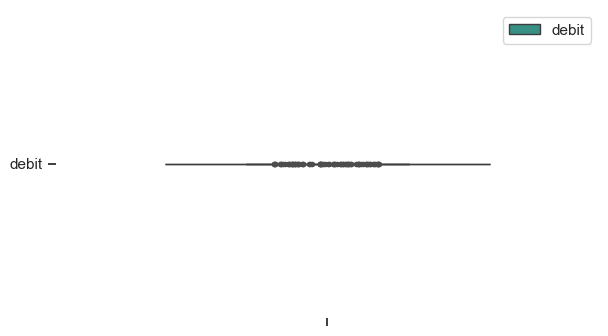

In [60]:
sns.set_theme(style="ticks")
plt.figure(figsize=(7, 4))

sns.boxplot(
    data=debit_card,
    x="gtgd_qd",
    y="card_type",
   hue="card_type", whis=[0, 100], width=0.6, palette=['#2a9d8f']
    
    
    #showmeans=True,  # Show mean as well
   # palette=["#ED7D31"],
    #linewidth=1.5,  # Thicker lines
    #fliersize=4,  # Smaller outliers

)
# Add points to show each observation
sns.stripplot(data=debit_card, x="gtgd_qd", y="card_type", size=4, color=".3")
# Tweak the visual presentation
plt.gca().xaxis.grid(True)
plt.ylabel("")  # Remove y-axis label
sns.despine(trim=True, left=True)

# Customize plot
#plt.title("Quantile Box Plot of Column1")
plt.xticks(rotation=45)
plt.grid(False)
#plt.legend(title="Quantiles", title_fontsize=12, frameon=False, loc='below')
plt.show()

In [51]:
debit_card.groupby(['trans_curr']).size()

trans_curr
USD    79
dtype: int64

In [52]:
debit_card_group = debit_card.groupby(['trans_date_update','target_id'])['gtgd_qd'].agg(['sum', 'count']).reset_index()

In [53]:
debit_card_group.describe()

,trans_date_update,target_id,sum,count
count,67,6.700000e+01,6.700000e+01,67.000000
mean,2023-12-29 10:23:17.014925312,1.492062e+08,1.565117e+06,1.179104
min,2023-10-07 00:00:00,9.069680e+06,1.474000e+03,1.000000
25%,2023-10-25 00:00:00,1.201614e+08,8.650903e+05,1.000000
50%,2023-12-19 00:00:00,1.461540e+08,1.370911e+06,1.000000
75%,2024-02-22 12:00:00,1.790208e+08,1.988622e+06,1.000000
max,2024-04-12 00:00:00,2.480407e+08,4.872404e+06,3.000000
std,NaN,6.250209e+07,9.920443e+05,0.490064


In [88]:
debit_card_group['count'].quantile(0.88)

2.0

In [141]:
x = debit_card_group.describe()

In [142]:
debit_card_jpy = afd_raw[(afd_raw['card_type'] == 'debit') & (afd_raw['trans_curr'] == 'JPY')]

In [144]:
debit_card_jpy.shape

(0, 46)

In [54]:
credit_card = afd_raw[afd_raw['card_type'] == 'credit']

In [56]:
credit_card.shape

(361, 46)

In [82]:
credit_card_group = credit_card.groupby(['trans_date_update','target_id'])['gtgd_qd'].agg(['sum', 'count']).reset_index()

In [83]:
credit_card_group.describe()

,trans_date_update,target_id,sum,count
count,344,3.440000e+02,3.440000e+02,344.000000
mean,2024-01-20 19:53:01.395348736,9.979925e+07,1.227731e+06,1.049419
min,2023-10-01 00:00:00,1.988328e+06,1.600406e+05,1.000000
25%,2023-12-05 00:00:00,2.075594e+07,8.356064e+05,1.000000
50%,2024-01-30 12:00:00,1.013932e+08,1.064119e+06,1.000000
75%,2024-03-12 06:00:00,1.736971e+08,1.533891e+06,1.000000
max,2024-04-14 00:00:00,2.443625e+08,4.316553e+06,3.000000
std,NaN,7.592068e+07,6.045214e+05,0.242436


In [87]:
credit_card_group['count'].quantile(0.97)

2.0

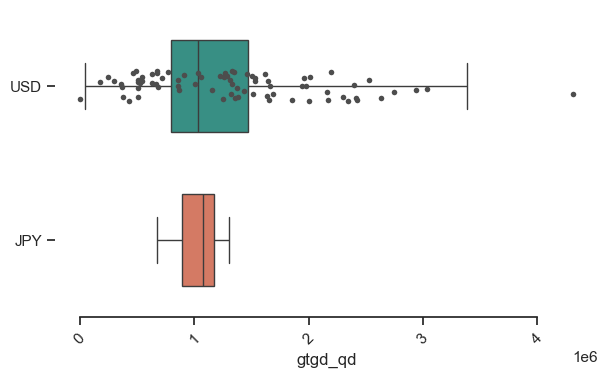

In [59]:
sns.set_theme(style="ticks")
plt.figure(figsize=(7, 4))

sns.boxplot(
    data=credit_card,
    x="gtgd_qd",
    y="trans_curr",
   hue="trans_curr", whis=[0, 100], width=0.6, palette=['#2a9d8f','#e76f51']
    
    
    #showmeans=True,  # Show mean as well
   # palette=["#ED7D31"],
    #linewidth=1.5,  # Thicker lines
    #fliersize=4,  # Smaller outliers

)
# Add points to show each observation
sns.stripplot(data=debit_card, x="gtgd_qd", y="trans_curr", size=4, color=".3")
# Tweak the visual presentation
plt.gca().xaxis.grid(True)
plt.ylabel("")  # Remove y-axis label
sns.despine(trim=True, left=True)

# Customize plot
#plt.title("Quantile Box Plot of Column1")
plt.xticks(rotation=45)
plt.grid(False)
#plt.legend(title="Quantiles", title_fontsize=12, frameon=False, loc='below')
plt.show()

In [69]:
credit_card_usd = afd_raw[(afd_raw['card_type'] == 'credit') & (afd_raw['trans_curr'] == 'USD')]

In [70]:
credit_card_usd.shape

(356, 46)

In [71]:
credit_card_usd_group = credit_card_usd.groupby(['trans_date_update','target_id'])['gtgd_qd'].agg(['sum', 'count']).reset_index()

In [72]:
credit_card_usd_group.shape

(339, 4)

In [73]:
credit_card_usd_group.describe()

,trans_date_update,target_id,sum,count
count,339,3.390000e+02,3.390000e+02,339.000000
mean,2024-01-20 09:46:11.681415936,9.921214e+07,1.230729e+06,1.050147
min,2023-10-01 00:00:00,1.988328e+06,1.600406e+05,1.000000
25%,2023-12-05 00:00:00,1.930198e+07,8.354171e+05,1.000000
50%,2024-01-30 00:00:00,9.782463e+07,1.063992e+06,1.000000
75%,2024-03-12 00:00:00,1.736971e+08,1.547270e+06,1.000000
max,2024-04-14 00:00:00,2.443625e+08,4.316553e+06,3.000000
std,NaN,7.614363e+07,6.078692e+05,0.244147


In [76]:
credit_card_usd_group.quantile(0.95)

trans_date_update    2024-04-07 00:00:00
target_id                    229371450.0
sum                          2400230.655
count                                1.0
Name: 0.95, dtype: object

In [77]:
credit_card_jpy = afd_raw[(afd_raw['card_type'] == 'credit') & (afd_raw['trans_curr'] == 'JPY')]

In [79]:
credit_card_jpy.shape

(5, 46)

In [78]:
credit_card_jpy_group = credit_card_jpy.groupby(['trans_date_update','target_id'])['gtgd_qd'].agg(['sum', 'count']).reset_index()

In [80]:
credit_card_jpy_group.describe()

,trans_date_update,target_id,sum,count
count,5,5.000000e+00,5.000000e+00,5.0
mean,2024-02-18 09:36:00,1.396051e+08,1.024462e+06,1.0
min,2023-12-02 00:00:00,1.076159e+08,6.722211e+05,1.0
25%,2024-02-18 00:00:00,1.217143e+08,8.938546e+05,1.0
50%,2024-02-28 00:00:00,1.217143e+08,1.075604e+06,1.0
75%,2024-03-24 00:00:00,1.217143e+08,1.174052e+06,1.0
max,2024-03-24 00:00:00,2.252665e+08,1.306578e+06,1.0
std,NaN,4.827376e+07,2.478477e+05,0.0


In [81]:
credit_card_jpy_group.quantile(0.)

trans_date_update    2024-02-28 00:00:00
target_id                    121714330.0
sum                           1075604.23
count                                1.0
Name: 0.5, dtype: object

In [163]:
auth_fin = "select * from TEMP.dbo.quynhntt17_qlrrt_chenh_lech_auth_fin_20240430;"

auth_fin = pd.read_sql(auth_fin, cnxn)

C:\Users\quynhntt17\AppData\Local\Temp\ipykernel_24120\544258598.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  auth_fin = pd.read_sql(auth_fin, cnxn)


In [164]:
auth_fin_usd = auth_fin[auth_fin['trans_curr'] == 'USD']

In [165]:
auth_fin_usd['chenh_lech_so_tien'].describe()

count    435.000000
mean      46.706414
std       24.576381
min       -0.940000
25%       29.950000
50%       40.870000
75%       59.815000
max      169.840000
Name: chenh_lech_so_tien, dtype: float64

In [166]:
auth_fin_jpy = auth_fin[auth_fin['trans_curr'] == 'JPY']

In [167]:
auth_fin_jpy['chenh_lech_so_tien'].describe()

count       5.000000
mean     6067.400000
std      1486.723175
min      4012.000000
25%      5188.000000
50%      6368.000000
75%      7008.000000
max      7761.000000
Name: chenh_lech_so_tien, dtype: float64

In [168]:
afd_raw.shape

(440, 46)

In [169]:
auth_fin_cif_debit = afd_raw[(afd_raw['card_type'] == 'debit')]

In [172]:
auth_fin_cif_debit_group = auth_fin_cif_debit.groupby(['trans_date_update','cif'])['trans_amount'].agg(['sum', 'count']).reset_index()

auth_fin_cif_debit_group.describe()

,trans_date_update,sum,count
count,67,67.000000,67.000000
mean,2023-12-29 10:23:17.014925312,62.772687,1.179104
min,2023-10-07 00:00:00,0.060000,1.000000
25%,2023-10-25 00:00:00,35.375000,1.000000
50%,2023-12-19 00:00:00,56.070000,1.000000
75%,2024-02-22 12:00:00,80.455000,1.000000
max,2024-04-12 00:00:00,193.020000,3.000000
std,NaN,39.296551,0.490064


In [176]:
auth_fin_cif_debit_group['count'].quantile(0.96)

2.3599999999999994

In [177]:
auth_fin_cif_credit = afd_raw[(afd_raw['card_type'] == 'credit')]

In [187]:
auth_fin_cif_credit_group = auth_fin_cif_credit.groupby(['trans_date_update','cif'])['trans_amount'].agg(['sum', 'count']).reset_index()

auth_fin_cif_credit_group.describe()

,trans_date_update,sum,count
count,344,344.000000,344.000000
mean,2024-01-20 19:53:01.395348736,136.303837,1.049419
min,2023-10-01 00:00:00,6.340000,1.000000
25%,2023-12-05 00:00:00,33.282500,1.000000
50%,2024-01-30 12:00:00,42.755000,1.000000
75%,2024-03-12 06:00:00,62.005000,1.000000
max,2024-04-14 00:00:00,7762.000000,3.000000
std,NaN,739.516341,0.242436


In [186]:
auth_fin_cif_credit_group['count'].quantile(0.95)

1.0

In [191]:
auth_fin_cif_credit_usd = afd_raw[(afd_raw['card_type'] == 'credit') & (afd_raw['trans_curr'] == 'USD') ]

In [192]:
auth_fin_cif_credit_usd

,id,amnd_date,amnd_officer,auth_code,is_authorization,outward_status,posting_date,posting_status,request_category,return_code,ret_ref_number,service_class,settl_amount,settl_curr,sic_code,sic_name,source_channel,source_code,source_id,source_member_id,source_number,source_reg_num,target_channel,target_fee_amount,target_fee_curr,target_id,target_member_id,target_number,trans_amount,trans_city,trans_condition,trans_country,trans_curr,trans_date,trans_details,trans_type,merchant_id,create_date,update_date,card_type,cif,segment,rate,gtgd_qd,trans_date_update,month
0,6.665916e+09,2023-12-18,Daovt_6279,134025,Fin,Closed,2023-12-18,Posted,Advice,Invalid amount,None,Transaction,37.89,USD,5542,5542 Automated Fuel Dispenser,MasterCard (IPM),124020000,5794.0,026021,00011007,None,Our MasterCards,0.0,None,17133986.0,None,524394______8412,37.89,SAINT PAUL,CAT PBT Chip Full Grade,UNITED STATES,USD,2023-12-16 01:35:30,HOLIDAY STATIONS 0264,Retail,313649176887,None,2023-12-21 03:38:45.853,credit,333162,AF,25243.0,956457.27,2023-12-16,202312
3,6.026549e+09,2023-10-23,Daovt_6279,878294,Fin,Closed,2023-10-23,Posted,Advice,Invalid amount,None,Transaction,2091576.00,VND,5542,5542 Automated Fuel Dispenser,VISA,0515,5790.0,494300,0126013,None,Our VISA Cards,0.0,None,175878270.0,None,405280______8366,85.11,GARDEN GROVE,CAT Authorized Chip Contactless,UNITED STATES,USD,2023-10-21 00:00:00,COSTCO GAS #0126,Retail,345002537883,None,2023-10-26 08:03:53.917,credit,12486757,AF,1.0,2091576.00,2023-10-21,202310
4,6.748411e+09,2023-12-25,Daovt_6279,719389,Fin,Closed,2023-12-25,Posted,Advice,Invalid amount,None,Transaction,40.89,USD,5542,5542 Automated Fuel Dispenser,MasterCard (IPM),124020000,5794.0,004966,00000001,None,Our MasterCards,0.0,None,142719060.0,None,524394______4787,40.89,KATY,CAT PBT Chip Full Grade,UNITED STATES,USD,2023-12-22 13:26:24,SHELL OIL 57545356909,Retail,330595910887,None,2023-12-28 03:29:00.157,credit,5647655,AF,25243.0,1032186.27,2023-12-22,202312
5,7.941473e+09,2024-04-08,Daovt_6279,329689,Fin,Closed,2024-04-08,Posted,Advice,Invalid amount,None,Transaction,33.69,USD,5542,5542 Automated Fuel Dispenser,MasterCard (IPM),124020000,5794.0,001019,006,None,Our MasterCards,0.0,None,35329281.0,None,518966______8823,33.69,PLANO,CAT PBT Chip Token Contactless,UNITED STATES,USD,2024-04-06 19:03:00,RACETRAC 99 00000992,Retail,974000009920000,None,2024-04-11 12:42:01.320,credit,196534,AF,25243.0,850436.67,2024-04-06,202404
7,7.942917e+09,2024-04-08,Daovt_6279,303345,Fin,Closed,2024-04-08,Posted,Advice,Invalid amount,None,Transaction,46.02,USD,5542,5542 Automated Fuel Dispenser,MasterCard (IPM),124020000,5794.0,003286,None,None,Our MasterCards,0.0,None,19301984.0,None,524394______5203,46.02,LUCEDALE,CAT PBT Chip Contactless,UNITED STATES,USD,2024-04-06 00:00:00,CHEVRON 0209169,Retail,595954001524073,None,2024-04-11 12:42:01.320,credit,1827092,AF,25243.0,1161682.86,2024-04-06,202404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,6.838593e+09,2024-01-02,Daovt_6279,635488,Fin,Closed,2024-01-02,Posted,Advice,Invalid amount,None,Transaction,57.11,USD,5542,5542 Automated Fuel Dispenser,MasterCard (IPM),124020000,5794.0,019254,C006,None,Our MasterCards,0.0,None,103635190.0,None,518966______6333,57.11,MARLTON,CAT Authorized,UNITED STATES,USD,2023-12-29 12:33:04,7-ELEVEN 33388,Retail,650000004793470,None,2024-01-05 03:35:14.973,credit,1247016,AF,25243.0,1441627.73,2023-12-29,202312
436,6.049631e+09,2023-10-25,Daovt_6279,859798,Fin,Closed,2023-10-25,Posted,Advice,Invalid amount,None,Transaction,56.34,USD,5542,5542 Automated Fuel Dispenser,MasterCard (IPM),124020000,5794.0,003286,None,None,Our MasterCards,0.0,None,175859770.0,None,518966______8258,56.34,HILLSBORO,CAT PBT Chip Full Grade,UNITED STATES,USD,2023-10-24 00:00:00,CHEVRON 0200841,Retail,595765901524073,None,2023-10-28 03:26:26.990,credit,8033111,MAF,25243.0,

In [193]:
auth_fin_cif_credit_usd_group = auth_fin_cif_credit_usd.groupby(['trans_date_update','cif'])['trans_amount'].agg(['sum', 'count']).reset_index()

auth_fin_cif_credit_usd_group.describe()

,trans_date_update,sum,count
count,339,339.000000,339.000000
mean,2024-01-20 09:46:11.681415936,48.809794,1.050147
min,2023-10-01 00:00:00,6.340000,1.000000
25%,2023-12-05 00:00:00,33.095000,1.000000
50%,2024-01-30 00:00:00,42.150000,1.000000
75%,2024-03-12 00:00:00,61.295000,1.000000
max,2024-04-14 00:00:00,171.000000,3.000000
std,NaN,24.082734,0.244147


In [194]:
auth_fin_cif_credit_jpy = afd_raw[(afd_raw['card_type'] == 'credit') & (afd_raw['trans_curr'] == 'JPY') ]

In [195]:
auth_fin_cif_credit_jpy_group = auth_fin_cif_credit_jpy.groupby(['trans_date_update','cif'])['trans_amount'].agg(['sum', 'count']).reset_index()

auth_fin_cif_credit_jpy_group.describe()

,trans_date_update,sum,count
count,5,5.000000,5.0
mean,2024-02-18 09:36:00,6068.400000,1.0
min,2023-12-02 00:00:00,4013.000000,1.0
25%,2024-02-18 00:00:00,5189.000000,1.0
50%,2024-02-28 00:00:00,6369.000000,1.0
75%,2024-03-24 00:00:00,7009.000000,1.0
max,2024-03-24 00:00:00,7762.000000,1.0
std,NaN,1486.723175,0.0
